# Topic Modeling

In [1]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

## Load Cleaned Data

In [12]:
hikes_df = pickle.load(open('../src/cleaned_hike_desc.pickle', 'rb'))
hikes_df.set_index('hike_id', inplace=True)

reviews = pickle.load(open('../src/cleaned_reviews.pickle', 'rb'))

In [11]:
reviews.set_index(['hike_id', 'user_id'], inplace=True)
reviews.head()

user_desc  \
hike_id user_id                                                               
hike_1  steph-scott-2     Beautiful in fall. Went on a Tuesday late morn...   
        diana-pinho-3     went on a Tuesday AM around 9ish and didn't ex...   
        jason-pennacchio  Hiked Oct 2020, hiked from parking lot #3. Arr...   
        lolita-dickson    We started with the blue trail and finished wi...   
        allie-jay-1       Definitely start with the red trail , it’s ste...   

                                                            cleaned_reviews  
hike_id user_id                                                              
hike_1  steph-scott-2     beautiful fall go tuesday late morning midfall...  
        diana-pinho-3     go tuesday around ish do not expect see many p...  
        jason-pennacchio  hiked oct hike parking lot arrive lot full ext...  
        lolita-dickson    start blue trail finish red one slippery today...  
        allie-jay-1       definitely start red trail steep difficult get...

## Feature Extraction

Set up Document Term Matrix with CountVectorizer

In [31]:
vectorizer = TfidfVectorizer(max_features=2000, max_df=0.7, min_df=10, ngram_range=(1,2))
hikes_dtm = vectorizer.fit_transform(hikes_df['cleaned_descriptions'])

## NMF

In [35]:
nmf_model = NMF(n_components=10, random_state=42)
nmf_model.fit(hikes_dtm)

NMF(n_components=10, random_state=42)

## Display Topics for NMF

In [19]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [36]:
display_topics(model=nmf_model, feature_names=vectorizer.get_feature_names(), no_top_words=10)


Topic  0
activity option, number activity, offer number, activity, number, option, trail offer, offer, loop, loop trail

Topic  1
loop, run, loop trail, hiking, use hiking, loop mile, primarily, primarily use, trail primarily, nature

Topic  2
well use, well, october dog, october, march, use march, trail must, must kept, kept leash, must

Topic  3
wild, flower, wild flower, beautiful wild, feature beautiful, beautiful, flower rate, flower good, feature, colorado feature

Topic  4
great forest, feature great, forest set, set, great, forest, set rate, set good, feature, set trail

Topic  5
accessible, accessible yearround, yearround, yearround dog, option accessible, trail must, kept leash, kept, must, leash

Topic  6
wildlife, see wildlife, chance see, chance, offer chance, see, wildlife rate, offer, wildlife good, lightly traffic

Topic  7
back trail, back, traffic back, waterfall, feature waterfall, difficult, rate difficult, difficult trail, waterfall rate, hiking

Topic  8
bird, tr

Topic 0

### Set topics back to dataframe


In [37]:
topic_results = nmf_model.transform(hikes_dtm)
hikes_df['NMF_Topic'] = topic_results.argmax(axis=1)

hikes_df.head()

In [28]:
hikes_df[hikes_df['NMF_Topic']==0]

,trail_description,cleaned_descriptions,NMF_Topic
hike_id,,,
hike_2456,Beebe Park Pond Loop is a 1.4 mile loop trail ...,beebe park pond loop mile loop trail locate ne...,0
hike_2156,Walden Preserve Trail is a 3.2 mile loop trail...,walden preserve trail mile loop trail locate n...,0
hike_2346,Niantic Boardwalk is a 2.1 mile out and back t...,niantic boardwalk mile back trail locate near ...,0
hike_2558,White Cedar Swamp / Deans Mill Preserve Loop i...,white cedar swamp dean mill preserve loop mile...,0
hike_2618,McKinney National Wildlife Refuge (Saltmeadow ...,mckinney national wildlife refuge saltmeadow u...,0
hike_2620,Oswegatchie Hills Red Trail is a 1.7 mile mode...,oswegatchie hill red trail mile moderately tra...,0
hike_2718,Camp Sloper Loop is a 2 mile loop trail locate...,camp sloper loop mile loop trail locate near s...,0
hike_2783,Rockwell Park Loop is a 1.4 mile lightly traff...,rockwell park loop mile lightly traffic loop t...,0
hike_2802,Lebanon Town Green is a 1.6 mile loop trail lo...,lebanon town green mile loop trail locate near...,0


*The terms "trail" and "also" shows up in multiple topics.  Maybe consider adding to the stop words.*
### Topic breakdown:
* Topic 0: Things the Trail offers
* Topic 1: Not much?
* Topic 2/3: Describe the trail features

In [68]:
# Descriptions
nmf_model = NMF(20)
trail_desc = nmf_model.fit_transform(hikes_dtm)
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
trail, locate, near, mile, virginia, running, pennsylvania, appalachian, west, valley

Topic  1
trail, offer, number, option, activity, traffic, mile, locate, near, lightly

Topic  2
good, skill, level, feature, near, locate, mile, walk, trail, carolina

Topic  3
loop, trail, feature, locate, near, mile, waterfall, massachusetts, run, connecticut

Topic  4
leash, kept, must, dog, also, able, use, trail, virginia, pennsylvania

Topic  5
april, use, well, september, traffic, october, november, bird, heavily, watch

Topic  6
wild, flower, beautiful, feature, near, locate, mile, colorado, mountain, virginia

Topic  7
offer, wildlife, see, chance, near, locate, mile, lightly, back, virginia

Topic  8
forest, great, set, feature, near, locate, mile, virginia, massachusetts, walk

Topic  9
nature, trip, use, primarily, hiking, walk, bird, traffic, watch, mile

Topic  10
accessible, yearround, heavily, traffic, carolina, tennessee, feature, north, near, locate

Topic  11
rate, modera


Trail Reviews

In [6]:
stopwords = []
vectorizer = TfidfVectorizer(max_features=2000, min_df=10, max_df=0.4, ngram_range=(1,2))
reviews_dtm = vectorizer.fit_transform(reviews['cleaned_reviews'])

In [7]:
lsa = TruncatedSVD(5)
reviews_topics = lsa.fit_transform(reviews_dtm)
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
not, great, view, nice, beautiful, get, go, easy, lot, good

Topic  1
great, great trail, great hike, great view, view, trail great, hike great, beautiful view, beautiful, view top

Topic  2
nice, beautiful, easy, nice trail, beautiful view, walk, view, nice easy, easy trail, easy hike

Topic  3
beautiful, beautiful view, beautiful trail, beautiful hike, view, hike beautiful, worth, trail beautiful, amazing, love

Topic  4
view, top, amazing, view top, great view, good, worth, awesome, amazing view, steep


Add hikes and trail to stopwords

In [8]:
# Descriptions
nmf_model = NMF(10)
reviews_ = nmf_model.fit_transform(reviews_dtm)

In [9]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
lot, go, get, mile, back, way, take, lake, parking, road

Topic  1
great, great trail, great hike, great view, trail great, hike great, kid, dog, family, great place

Topic  2
nice, nice trail, nice hike, nice view, walk, nice walk, trail nice, nice easy, little, really nice

Topic  3
beautiful, beautiful view, beautiful trail, beautiful hike, trail beautiful, hike beautiful, fall, waterfall, beautiful scenery, scenery

Topic  4
view, top, amazing, view top, great view, awesome, worth, amazing view, beautiful view, steep

Topic  5
easy, easy hike, easy trail, walk, nice easy, easy walk, trail easy, pretty, kid, fun

Topic  6
well, maintain, mark, well maintain, well mark, trail well, marked, well marked, well worth, maintain trail

Topic  7
love, love trail, dog, love hike, place, kid, dog love, year, old, year old

Topic  8
good, good trail, good hike, good view, trail good, workout, good workout, hike good, kid, one good

Topic  9
not, do, be, do not, pron, be not, pron be,

# Trail Review
* Topic 0: Not much
* Topic 1, 2: Family Friendly
* Topic 3: Prioritizes Views
* Topic 4: Harder hikes with good payout
* Topic 5: Easy
* Topic 6: Well maintained
* Topic 7: Love Love Love
* Topic 8: Good / Moderate Emotion
* Topic 9: Not what the trail description highlights? / Negativity

In [153]:
nmf_topic_df = pd.DataFrame(reviews_.round(5), index=reviews.cleaned_reviews, columns=['Topic_'+str(i) for i in range(10)])

In [154]:
nmf_topic_df.reset_index(inplace=True)

# nmf_topic_df.sort_values(by='Topic_5', ascending=False).head(40)
nmf_topic_df['review_len'] = nmf_topic_df.cleaned_reviews.map(lambda x: len(x.split()))

In [166]:
mask = nmf_topic_df['review_len']>2
nmf_topic_df[mask].sort_values(by='Topic_9', ascending=False).head(20)

,cleaned_reviews,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,review_len
55682,alright not mtb,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
490062,not weak hearted,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
462125,not faint hearted,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
191856,not peen worthy,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
306933,not fan dull,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
375820,brown not colorful,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
428054,not bikeable trail,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
337972,progress not perfection,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
314787,not public trail,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,3
416221,not qualify trail walkway,0.000,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.07670,4


In [151]:
import seaborn as sns

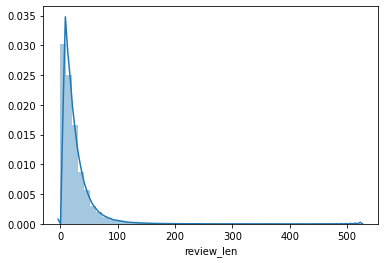

In [152]:
sns.distplot(nmf_topic_df['review_len'])

In [106]:
# LDA 
vectorizer = CountVectorizer(max_features=2000,  min_df=10, ngram_range=(1,2))
hikes_dtm = vectorizer.fit_transform(hikes_df['cleaned_descriptions'])

lda_hikes = LatentDirichletAllocation(n_components=7)
lda_hikes.fit(hikes_dtm)

LatentDirichletAllocation(n_components=7)

In [107]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_hikes, hikes_dtm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.088410  0.100123       1        1  26.209373
0     -0.013058  0.005040       2        1  17.701948
2     -0.031307  0.109093       3        1  16.618018
3      0.019958  0.049564       4        1  14.761783
6      0.151511  0.051708       5        1  13.690120
4      0.173003 -0.164510       6        1   6.354856
1     -0.211698 -0.151018       7        1   4.663903, topic_info=                 Term         Freq        Total Category  logprob  loglift
1327            offer  7364.000000  7364.000000  Default  30.0000  30.0000
7     activity option  5287.000000  5287.000000  Default  29.0000  29.0000
1317  number activity  5287.000000  5287.000000  Default  28.0000  28.0000
1329     offer number  5287.000000  5287.000000  Default  27.0000  27.0000
6            activity  5287.000000  5287.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
1771       trail mile   317.427517  6800.457791   Topic7  -4.8123   0.0008
1759     traffic back   301.182788  4937.894481   Topic7  -4.8648   0.2683
1838        use trail   293.034059  9854.565054   Topic7  -4.8923  -0.4501
0                able   291.744558  9846.600386   Topic7  -4.8967  -0.4537
1            able use   291.738562  9846.607435   Topic7  -4.8967  -0.4537

[532 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         1  0.345805           able
0         2  0.155384           able
0         3  0.339305           able
0         4  0.129385           able
0         5  0.000508           able
...     ...       ...            ...
1987      1  0.437121  yearround dog
1987      3  0.557223  yearround dog
1987      7  0.005487  yearround dog
1996      2  0.997238  york features
1997      7  0.991425     york offer

[1070 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 3, 4, 7, 5, 2])

* Topic 1: Multi Use Trail
* Topic 2: Moderate Rated Trails?
* Topic 3: Dog Friendly
* Topic 7: Difficult

In [ ]:
# Look at count of scores that are over a certain threshold to remove nonsense words

In [108]:
vectorizer = CountVectorizer(max_features=2000,  min_df=10, ngram_range=(1,2))
reviews_dtm = vectorizer.fit_transform(reviews['cleaned_reviews'])

'3.8.3 (default, Jul  2 2020, 11:26:31) \n[Clang 10.0.0 ]'